### **CREDIT DEFAULT ANALYSIS**

Credit default in Taiwan from April 2005 to September 2005



###  **1. Import data**

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Import data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Credit_data.csv', index_col=['ID'])
df.sample(5)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_0
ID,,,,,,,,,,,,,,,,,,,,,
8245,80000,1,4,2,30,0,0,0,-2,-2,...,0.0,0.0,0.0,5009.0,0.0,0.0,0.0,0.0,0.0,0
6749,30000,1,1,2,23,0,0,0,0,0,...,29705.0,28647.0,28776.0,1496.0,1735.0,1030.0,1017.0,1033.0,989.0,0
8873,300000,2,1,1,47,-2,-2,-1,-1,-1,...,5916.0,9634.0,0.0,5189.0,7128.0,5923.0,9634.0,0.0,6485.0,0
11513,150000,1,1,2,26,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5148,330000,2,2,1,47,1,-2,-2,-1,-1,...,3155.0,4550.0,1264.0,0.0,0.0,3155.0,4550.0,1264.0,813.0,0


**DESCRIPTION OF DATA**

The data set has 24000 rows and 25 columns (equivalent to 25 variables):

• ID: ID of each client

• LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

• SEX: Gender (1=male, 2=female)

• EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

• MARRIAGE: Marital status (1=married, 2=single, 3=others)

• AGE: Age in years

• PAY_0: Repayment status in September, 2005 (-2 = Balance paid in full and no transactions this period, -1= Balance paid in full, but occurs transaction this period, 0 = Paid the minimum due amount, but not the entire balance, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

• PAY_2: Repayment status in August, 2005 (scale same as above)

• PAY_3: Repayment status in July, 2005 (scale same as above)

• PAY_4: Repayment status in June, 2005 (scale same as above)

• PAY_5: Repayment status in May, 2005 (scale same as above)

• PAY_6: Repayment status in April, 2005 (scale same as above)

• BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

• BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

• BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

• BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

• BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

• BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

• PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

• PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

• PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

• PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

• PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

• PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

• default_0: Default payment next month (1=Default, 0= Not default)

In [4]:
pay = df[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
pay_melt = pd.melt(pay)
print(pay_melt['value'].value_counts())

 0    76498
-1    28068
-2    19524
 2    15134
 1     2937
 3     1116
 4      352
 7      176
 5      110
 6       59
 8       26
Name: value, dtype: int64


For credit default analysis, we pay attention to the delay payment which is labeled as number from 1 to 8 (equivalent 1-month-delay to 8-month-delay)

### **2. Cleansing data**

In [5]:
#Checking null value => No null value in data set
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default_0    0
dtype: int64

In [6]:
#Checking duplicate value
df.duplicated()

ID
1        False
2        False
3        False
4        False
5        False
         ...  
23996    False
23997    False
23998    False
23999    False
24000    False
Length: 24000, dtype: bool

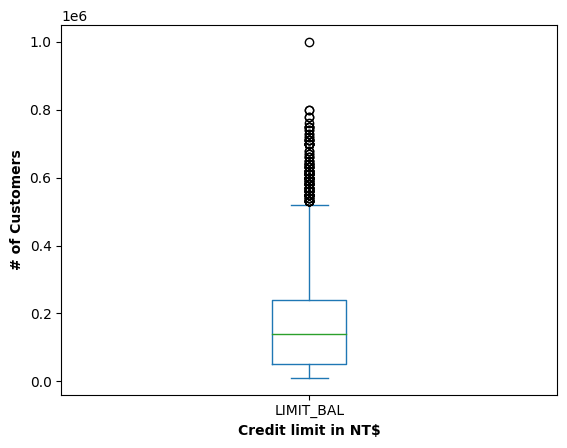

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_0
ID,,,,,,,,,,,,,,,,,,,,,
1769,1000000,2,1,1,47,0,0,0,-1,0,...,891586.0,927171.0,961664.0,50784.0,50723.0,896040.0,50000.0,50000.0,50256.0,0


In [7]:
#Identify outliers
# Use boxplot to identify any outlier in credit limit

df["LIMIT_BAL"].plot(kind="box")
plt.xlabel('Credit limit in NT$', fontweight='bold')
plt.ylabel('# of Customers', fontweight='bold')
plt.show()

outliers = df.loc[df['LIMIT_BAL']>900000]
outliers
#There is 1 outlier in the data set, which is a customer who has 1000000 limit balance and has an excellent payment history => Should be consider as a valid data


### **3.EDA**

In [8]:
# Create a new column "HAS_DEFAULT" to indicate customers who have at least 1 default payment from PAY_1 to Pay_6 and define 0 as no default and 1 as has default
default_case = (df.PAY_1 >1) | (df.PAY_2 >1) | (df.PAY_3 >1) | (df.PAY_4 >1) | (df.PAY_5 >1) | (df.PAY_6 >1)
df.loc[default_case, "HAS_DEFAULT"] = 1
df.loc[df.HAS_DEFAULT.isna(), "HAS_DEFAULT"] = 0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 1 to 24000
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LIMIT_BAL    24000 non-null  int64  
 1   SEX          24000 non-null  int64  
 2   EDUCATION    24000 non-null  int64  
 3   MARRIAGE     24000 non-null  int64  
 4   AGE          24000 non-null  int64  
 5   PAY_1        24000 non-null  int64  
 6   PAY_2        24000 non-null  int64  
 7   PAY_3        24000 non-null  int64  
 8   PAY_4        24000 non-null  int64  
 9   PAY_5        24000 non-null  int64  
 10  PAY_6        24000 non-null  int64  
 11  BILL_AMT1    24000 non-null  float64
 12  BILL_AMT2    24000 non-null  float64
 13  BILL_AMT3    24000 non-null  float64
 14  BILL_AMT4    24000 non-null  float64
 15  BILL_AMT5    24000 non-null  float64
 16  BILL_AMT6    24000 non-null  float64
 17  PAY_AMT1     24000 non-null  float64
 18  PAY_AMT2     24000 non-null  float64
 19  PAY_

In [10]:
data = df.copy()
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_0,HAS_DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1.0
2,90000,2,2,2,34,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0.0
3,50000,2,2,1,37,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0.0
4,50000,1,2,1,57,-1,0,-1,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0.0
5,50000,1,1,2,37,0,0,0,0,0,...,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23996,80000,1,2,2,34,2,2,2,2,2,...,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1,1.0
23997,150000,1,3,2,43,-1,-1,-1,-1,0,...,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,0.0
23998,30000,1,2,2,37,4,3,2,-1,0,...,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,1.0


Text(0.5, 1.0, 'Number of customers by gender')

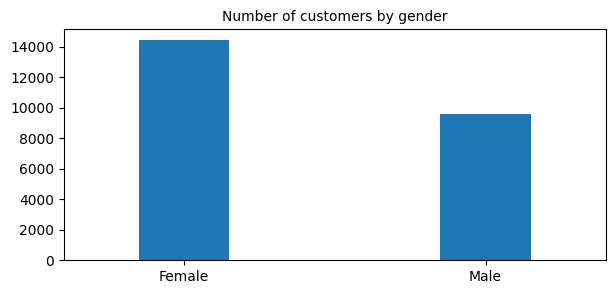

In [11]:
# Gender
df['SEX']=df['SEX'].replace(to_replace = [1,2], value=['Male', 'Female']).astype('str')
fig, ax = plt.subplots(figsize = (7,3))
df['SEX'].value_counts().plot(kind = 'bar', width = 0.3, rot = 0)
ax.set_title('Number of customers by gender', fontsize = 10)

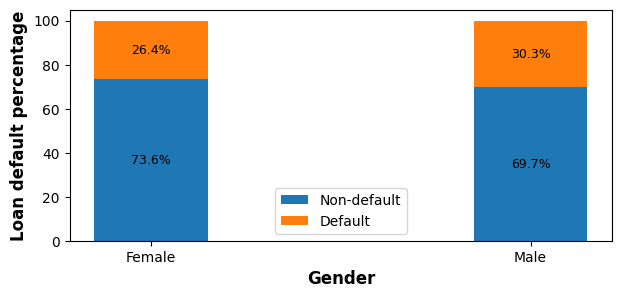

In [12]:
#Default by gender
gender_default = (df.groupby("SEX")['HAS_DEFAULT'].value_counts(normalize = True).mul(100).round(2).unstack())

fig, ax = plt.subplots(figsize = (7,3))
ax.bar(gender_default.index, gender_default[0], label = 'Non-default', width = 0.3)
ax.bar(gender_default.index, gender_default[1], bottom = gender_default[0], label = 'Default', width = 0.3)
ax.tick_params(labelsize = 10, labelrotation = 0)
ax.set_ylabel("Loan default percentage", size = 12, fontweight="bold")
ax.set_xlabel("Gender", size = 12, fontweight="bold")
ax.legend(loc="best")

for c in ax.containers:
  labels = [str(round(v.get_height(), 1)) + "%" if v.get_height() > 0 else '' for v in c]
  ax.bar_label(c, label_type='center', labels = labels, size = 9)
plt.show()

=> 30% male have default payment while 26% female have default payment, the difference is not significant.

Text(0.5, 1.0, 'Number of customers by education level')

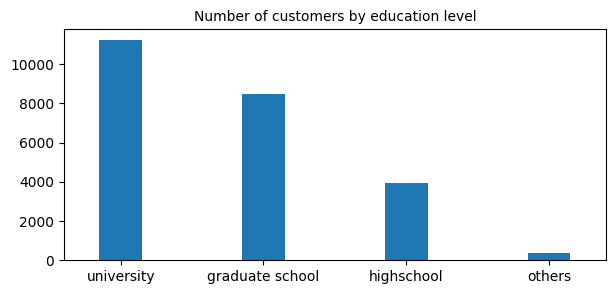

In [13]:
#Change value EDUCATION column: 4, 5, 6 to 0 and define 0 as 'others'
# 1=graduate school, 2=university, 3=high school, 0=others
df['EDUCATION'].unique
df["EDUCATION"] = df["EDUCATION"].replace({4:0,5:0,6:0})
df["EDUCATION"] = df["EDUCATION"].replace({0: 'others', 1:'graduate school', 2: 'university', 3: 'highschool'}).astype('string')
fig, ax = plt.subplots(figsize = (7,3))
df['EDUCATION'].value_counts().plot(kind = 'bar', width = 0.3, rot = 0)
ax.set_title('Number of customers by education level', fontsize = 10)

=> The result above indicates that customers with lower education levels default more. Customers with high school and university educational level had higher default percentages than customers with grad school education did.

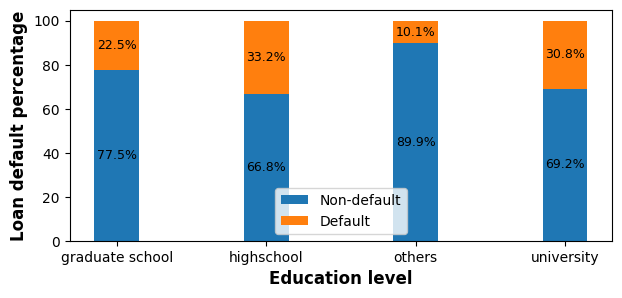

In [14]:
#Default by education level
edu_default = (df.groupby("EDUCATION")['HAS_DEFAULT'].value_counts(normalize = True).mul(100).round(2).unstack())

fig, ax = plt.subplots(figsize = (7,3))
ax.bar(edu_default.index, edu_default[0], label = 'Non-default', width = 0.3)
ax.bar(edu_default.index, edu_default[1], bottom = edu_default[0], label = 'Default', width = 0.3)
ax.tick_params(labelsize = 10, labelrotation = 0)
ax.set_ylabel("Loan default percentage", size = 12, fontweight="bold")
ax.set_xlabel("Education level", size = 12, fontweight="bold")
ax.legend(loc="lower center")

for c in ax.containers:
  labels = [str(round(v.get_height(), 1)) + "%" if v.get_height() > 0 else '' for v in c]
  ax.bar_label(c, label_type='center', labels = labels, size = 9)
plt.show()

Text(0.5, 1.0, 'Number of customers by marital status')

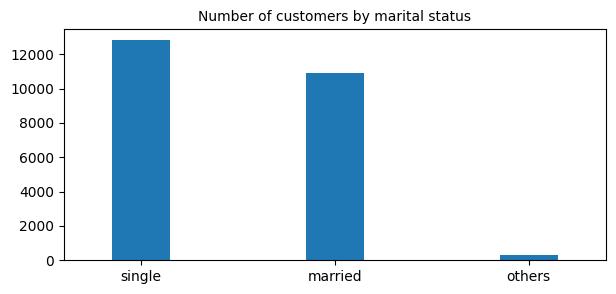

In [15]:
#Change value MARRIAGE column
df["MARRIAGE"].unique()
#Combine value 0 and 3 by changing the value 0 to 3
df["MARRIAGE"] = df["MARRIAGE"].replace({0:3})
df['MARRIAGE'] = df['MARRIAGE'].replace({1: 'married', 2: 'single', 3: 'others'}).astype('string')
fig, ax = plt.subplots(figsize = (7,3))
df['MARRIAGE'].value_counts().plot(kind = 'bar', width = 0.3, rot = 0)
ax.set_title('Number of customers by marital status', fontsize = 10)

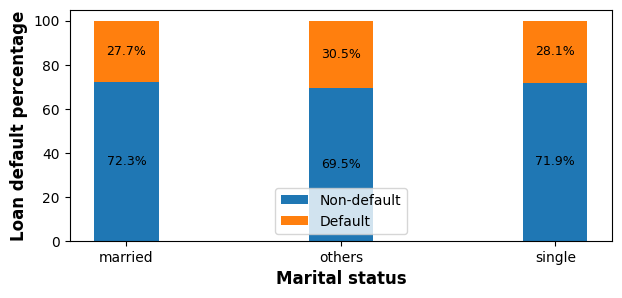

In [16]:
mar_default = (df.groupby("MARRIAGE")['HAS_DEFAULT'].value_counts(normalize = True).mul(100).round(2).unstack())

fig, ax = plt.subplots(figsize = (7,3))
ax.bar(mar_default.index, mar_default[0], label = 'Non-default', width = 0.3)
ax.bar(mar_default.index, mar_default[1], bottom = mar_default[0], label = 'Default', width = 0.3)
ax.tick_params(labelsize = 10, labelrotation = 0)
ax.set_ylabel("Loan default percentage", size = 12, fontweight="bold")
ax.set_xlabel("Marital status", size = 12, fontweight="bold")
ax.legend(loc="lower center")

for c in ax.containers:
  labels = [str(round(v.get_height(), 1)) + "%" if v.get_height() > 0 else '' for v in c]
  ax.bar_label(c, label_type='center', labels = labels, size = 9)
plt.show()

=> There is no difference of default risk in terms of marital status, although the 'other'marital status group had a little higher default percentage.

Text(0.5, 1.0, 'Number of customers by age')

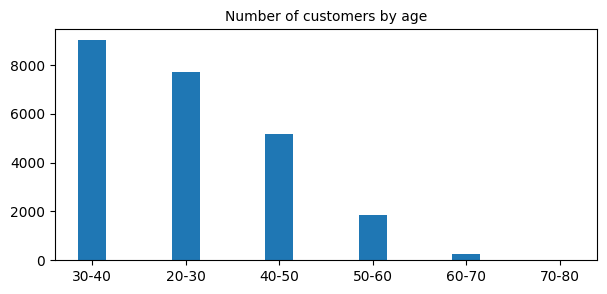

In [17]:
bins= [20,30,40,50,60,70,80]
labels = ['20-30','30-40','40-50','50-60','60-70','70-80']
df['AGE'] = pd.cut(df['AGE'],bins=bins, labels=labels,right=False)

fig, ax = plt.subplots(figsize = (7,3))
df['AGE'].value_counts().plot(kind = 'bar', width = 0.3, rot = 0)
ax.set_title('Number of customers by age', fontsize = 10)

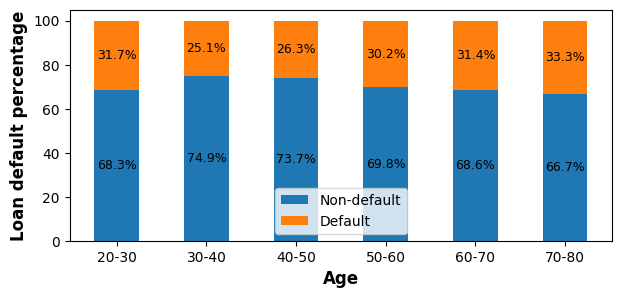

In [18]:
age_default = (df.groupby("AGE")['HAS_DEFAULT'].value_counts(normalize = True).mul(100).round(2).unstack())

fig, ax = plt.subplots(figsize = (7,3))
ax.bar(age_default.index, age_default[0], label = 'Non-default', width = 0.5)
ax.bar(age_default.index, age_default[1], bottom = age_default[0], label = 'Default', width = 0.5)
ax.tick_params(labelsize = 10, labelrotation = 0)
ax.set_ylabel("Loan default percentage", size = 12, fontweight="bold")
ax.set_xlabel("Age", size = 12, fontweight="bold")
ax.legend(loc="lower center")

for c in ax.containers:
  labels = [str(round(v.get_height(), 1)) + "%" if v.get_height() > 0 else '' for v in c]
  ax.bar_label(c, label_type='center', labels = labels, size = 9)
plt.show()

Customers aged between 30-50 had the lowest delayed payment rate (25%), while older groups (50-70) all had higher delayed payment rates. The highest delayed payment rate belongs to the youngest group (20-30 years old) and the oldest group (70-80 years old)

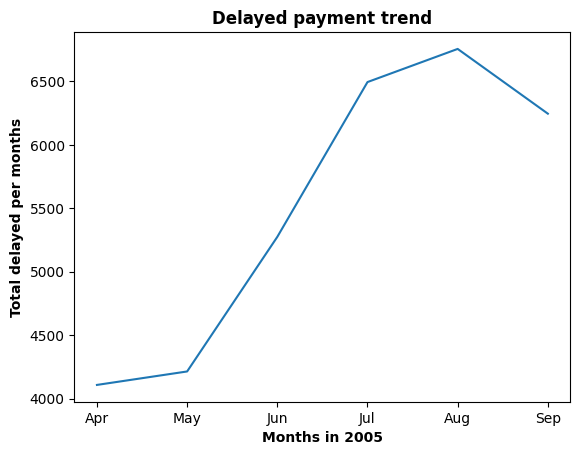

In [19]:
#Delayed payment trend
default_month = df[df['HAS_DEFAULT']== 1]
default_trend = default_month[['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1']].sum(axis=0)

fig,ax = plt.subplots()
ax.plot(default_trend)
plt.xticks(['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1'],['Apr','May','Jun','Jul','Aug','Sep'])

plt.xlabel('Months in 2005',fontweight='bold')
plt.ylabel('Total delayed per months',fontweight='bold')
plt.title('Delayed payment trend',fontweight='bold')

plt.show()

There was a huge jump from May 2005 to July, 2005 when delayed payment increased significantly, then it peaked at August 2005 with 6755 cases, things started to get better in September 2005

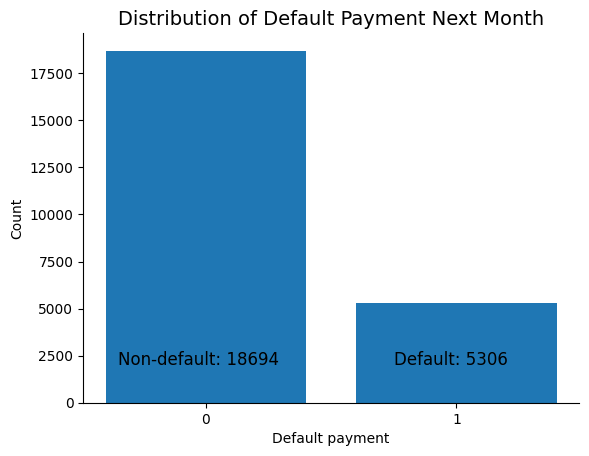

In [20]:
#Distribution of default next month => The data is highly imbalanced. For default prediction, we need to pay more attention on the minority class, which predict the defaulter
values = df['default_0']
val,count = np.unique(values, return_counts=True)

fig, ax = plt.subplots()
ax.bar(x=range(len(val)), height=count)

ax.annotate(f'Non-default: {count[0]}', xy=(-0.3, 15000), xytext=(-0.35, 2000), size=12)
ax.annotate(f'Default: {count[1]}', xy=(0.75, 15000), xytext=(0.75, 2000), size=12)
ax.set_ylabel('Count')
ax.set_xlabel('Default payment')
ax.set_title('Distribution of Default Payment Next Month', size=14)
ax.set_xticks(range(len(val)))
ax.set_xticklabels(val)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

### **4. Modeling**

### Import libraries

In [21]:
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
from pprint import pprint
import joblib
import imblearn

from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

### Prepare for modeling

In [22]:
# Define predictor variables and target variable
y = data['default_0']
X = data.drop(columns=['default_0'])


In [25]:
#Split data
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3,shuffle=True, stratify=y, random_state=42)
# use SMOTE to over sample data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 1)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
#Split data with Standard Scaler
from sklearn.preprocessing import StandardScaler
X_train_std = StandardScaler().fit_transform(X_train)


### Classification modeling prediction

### **LOGISTIC REGRESSION**

In [26]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression().fit(X_train, y_train)
y_lor_pred = lor.predict(X_test)
print(classification_report(y_test, y_lor_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5608
           1       0.50      0.00      0.00      1592

    accuracy                           0.78      7200
   macro avg       0.64      0.50      0.44      7200
weighted avg       0.72      0.78      0.68      7200



In [27]:
#Logistic regression with SMOTE
lor_sm = LogisticRegression().fit(X_train_sm, y_train_sm)
y_lor_sm_pred = lor_sm.predict(X_test)
print(classification_report(y_test, y_lor_sm_pred))

              precision    recall  f1-score   support

           0       0.85      0.59      0.69      5608
           1       0.31      0.65      0.42      1592

    accuracy                           0.60      7200
   macro avg       0.58      0.62      0.55      7200
weighted avg       0.73      0.60      0.63      7200



In [28]:
#Logistic regression with Standard Scaler
lor_std = LogisticRegression().fit(X_train_std, y_train)
y_lor_std_pred = lor_std.predict(X_test)
print(classification_report(y_test, y_lor_std_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      5608
           1       0.24      0.00      0.01      1592

    accuracy                           0.78      7200
   macro avg       0.51      0.50      0.44      7200
weighted avg       0.66      0.78      0.68      7200



Text(0.5, 1.0, 'Logistic Regression with Standard Scaler')

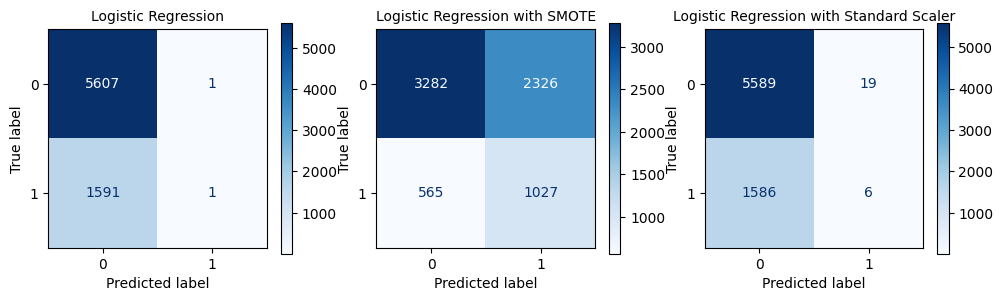

In [29]:
#Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
fig,ax=plt.subplots(1,3, figsize=(12,3))

ConfusionMatrixDisplay.from_estimator(lor, X_test, y_test, ax = ax[0], cmap = 'Blues' )
ax[0].set_title("Logistic Regression", fontsize = 10)

ConfusionMatrixDisplay.from_estimator(lor_sm, X_test, y_test, ax = ax[1], cmap = 'Blues')
ax[1].set_title("Logistic Regression with SMOTE", fontsize = 10)

ConfusionMatrixDisplay.from_estimator(lor_std, X_test, y_test, ax = ax[2], cmap = 'Blues')
ax[2].set_title("Logistic Regression with Standard Scaler", fontsize = 10)

Best model parameter:  {'max_iter': 200, 'penalty': 'l2', 'tol': 0.01}
              precision    recall  f1-score   support

           0       0.87      0.51      0.64      5608
           1       0.29      0.72      0.42      1592

    accuracy                           0.56      7200
   macro avg       0.58      0.62      0.53      7200
weighted avg       0.74      0.56      0.59      7200



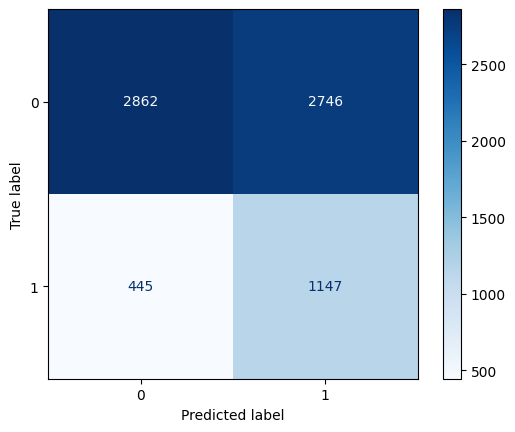

In [30]:
#Best parameters
hps={
    'penalty': ['l1', 'l2'],
     'tol' : [1e-2, 1e-3,1e-4],
     'max_iter' : [50,200,500,1000]
}
grids= GridSearchCV(LogisticRegression(),hps)
lor_best = grids.fit(X_train_sm, y_train_sm)
print("Best model parameter: ",grids.best_params_)
y_grids_pred=grids.predict(X_test)
print(classification_report(y_test, y_grids_pred))
ConfusionMatrixDisplay.from_estimator(lor_best, X_test, y_test, cmap = 'Blues' )



### Model Performance:
The business nature of credit card default analysis requires model to have a high recall. Logstic Regression model has a recall as 0.720

### **RANDOM FOREST**

In [31]:
#Random Forest Classification
rfc = RandomForestClassifier().fit(X_train, y_train)
y_rfc_pred = rfc.predict(X_test)
print(classification_report(y_test, y_rfc_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5608
           1       0.66      0.37      0.47      1592

    accuracy                           0.82      7200
   macro avg       0.75      0.66      0.68      7200
weighted avg       0.80      0.82      0.80      7200



In [32]:
#Random Forest Classification with SMOTE
rfc_sm = RandomForestClassifier().fit(X_train_sm, y_train_sm)
y_rfc_sm_pred = rfc_sm.predict(X_test)
print(classification_report(y_test, y_rfc_sm_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      5608
           1       0.56      0.46      0.50      1592

    accuracy                           0.80      7200
   macro avg       0.71      0.68      0.69      7200
weighted avg       0.79      0.80      0.79      7200



In [33]:
#Random Forest Classification with Standard Scaler
rfc_std = RandomForestClassifier().fit(X_train_std, y_train)
y_rfc_std_pred = rfc_std.predict(X_test)
print(classification_report(y_test, y_rfc_std_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.89      5608
           1       0.63      0.34      0.44      1592

    accuracy                           0.81      7200
   macro avg       0.73      0.64      0.66      7200
weighted avg       0.79      0.81      0.79      7200



Text(0.5, 1.0, 'Random Forest Classification with Standard Scaler')

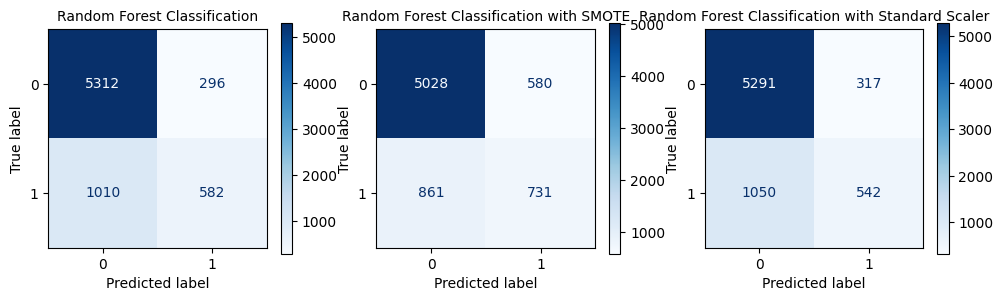

In [34]:
#Confusion matrix
fig,ax=plt.subplots(1,3, figsize=(12,3))

ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test, ax = ax[0], cmap = 'Blues' )
ax[0].set_title("Random Forest Classification", fontsize = 10)

ConfusionMatrixDisplay.from_estimator(rfc_sm, X_test, y_test, ax = ax[1], cmap = 'Blues')
ax[1].set_title("Random Forest Classification with SMOTE", fontsize = 10)

ConfusionMatrixDisplay.from_estimator(rfc_std, X_test, y_test, ax = ax[2], cmap = 'Blues')
ax[2].set_title("Random Forest Classification with Standard Scaler", fontsize = 10)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best model parameter:  {'max_depth': 18, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      5608
           1       0.56      0.49      0.52      1592

    accuracy                           0.80      7200
   macro avg       0.71      0.69      0.70      7200
weighted avg       0.79      0.80      0.80      7200



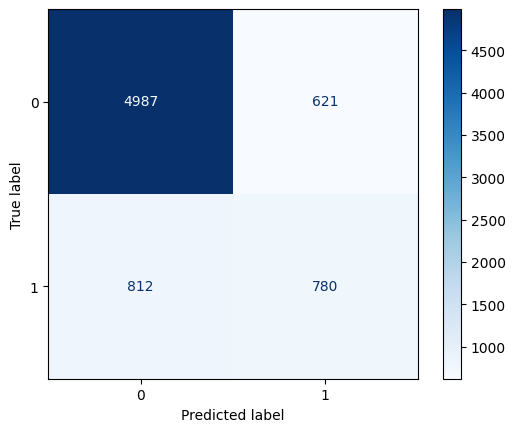

In [36]:
param_grid = {
    'max_depth': [5, 9, 18],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

rfc_grid = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfc_grid, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 1)

rfc_best = grid_search.fit(X_train_sm, y_train_sm)
print("Best model parameter: ", grid_search.best_params_)
grid_search.best_estimator_
y_grid_search=grid_search.predict(X_test)

print(classification_report(y_test, y_grid_search))
ConfusionMatrixDisplay.from_estimator(rfc_best, X_test, y_test, cmap = 'Blues')

### **XGBOOST**

In [37]:
from xgboost import XGBClassifier
#XGBoost
xgb = XGBClassifier().fit(X_train, y_train)
y_xgb_pred = xgb.predict(X_test)
print(classification_report(y_test, y_xgb_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5608
           1       0.64      0.35      0.46      1592

    accuracy                           0.81      7200
   macro avg       0.74      0.65      0.67      7200
weighted avg       0.79      0.81      0.79      7200



In [38]:
#XGBoost with SMOTE
xgb_sm = XGBClassifier().fit(X_train_sm, y_train_sm)
y_xgb_sm_pred = xgb_sm.predict(X_test)
print(classification_report(y_test, y_xgb_sm_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      5608
           1       0.52      0.45      0.48      1592

    accuracy                           0.79      7200
   macro avg       0.68      0.67      0.67      7200
weighted avg       0.78      0.79      0.78      7200



In [39]:
#XGBoost with Standard Scaler
xgb_std = XGBClassifier().fit(X_train_std, y_train)
y_xgb_std_pred = xgb_std.predict(X_test)
print(classification_report(y_test, y_xgb_std_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      5608
           1       0.59      0.32      0.42      1592

    accuracy                           0.80      7200
   macro avg       0.71      0.63      0.65      7200
weighted avg       0.78      0.80      0.78      7200



Text(0.5, 1.0, 'XGBoost with Standard Scaler')

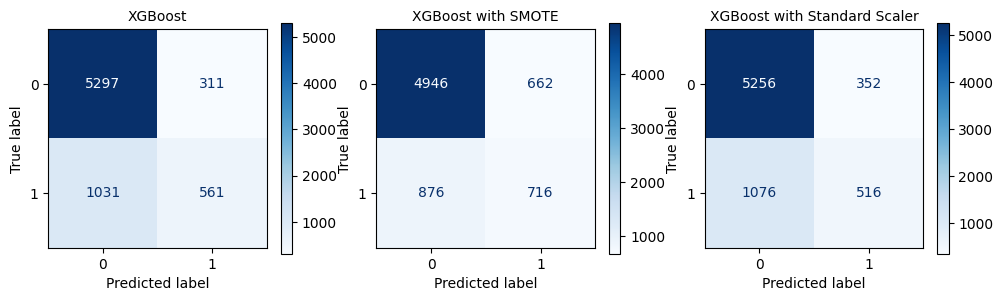

In [40]:
#Confusion matrix
fig,ax=plt.subplots(1,3, figsize=(12,3))

ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test, ax = ax[0], cmap = 'Blues' )
ax[0].set_title("XGBoost", fontsize = 10)

ConfusionMatrixDisplay.from_estimator(xgb_sm, X_test, y_test, ax = ax[1], cmap = 'Blues')
ax[1].set_title("XGBoost with SMOTE", fontsize = 10)

ConfusionMatrixDisplay.from_estimator(xgb_std, X_test, y_test, ax = ax[2], cmap = 'Blues')
ax[2].set_title("XGBoost with Standard Scaler", fontsize = 10)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best model parameter:  {'max_depth': 9, 'max_leaf_nodes': 5, 'n_estimators': 500}
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      5608
           1       0.46      0.60      0.52      1592

    accuracy                           0.76      7200
   macro avg       0.67      0.70      0.68      7200
weighted avg       0.79      0.76      0.77      7200



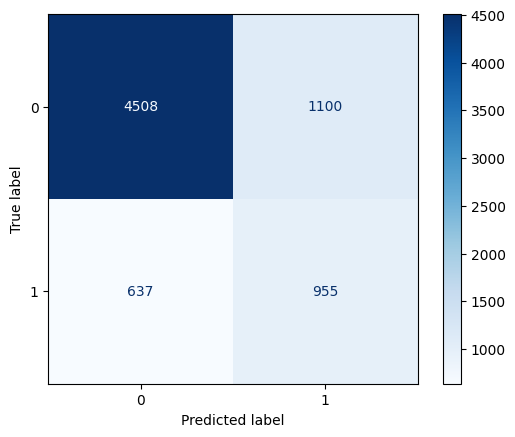

In [42]:
param= {
    'max_depth': [5, 9, 18],
    'max_leaf_nodes': [3, 4, 5],
    'n_estimators': [100, 300, 500],
}

xgb_grid = RandomForestClassifier()

grid_search = GridSearchCV(estimator = xgb_grid, param_grid = param,
                          cv = 3, n_jobs = -1, verbose = 1)

xgb_best = grid_search.fit(X_train_sm, y_train_sm)
print("Best model parameter: ", grid_search.best_params_)
grid_search.best_estimator_
y_grid_search=grid_search.predict(X_test)

print(classification_report(y_test, y_grid_search))
ConfusionMatrixDisplay.from_estimator(xgb_best, X_test, y_test, cmap = 'Blues')

### MODEL COMPARISON

**CONFUSION MATRIX**

Text(0.5, 1.0, 'XGBoost best model')

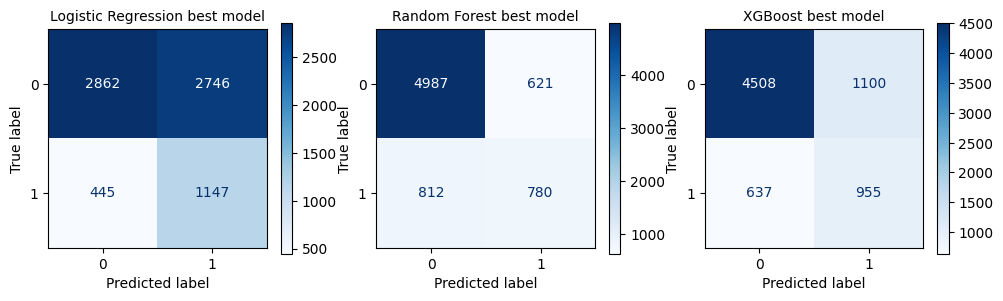

In [43]:
fig,ax=plt.subplots(1,3, figsize=(12,3))

ConfusionMatrixDisplay.from_estimator(lor_best, X_test, y_test, ax = ax[0], cmap = 'Blues')
ax[0].set_title("Logistic Regression best model", fontsize = 10)

ConfusionMatrixDisplay.from_estimator(rfc_best, X_test, y_test, ax = ax[1], cmap = 'Blues')
ax[1].set_title("Random Forest best model", fontsize = 10)

ConfusionMatrixDisplay.from_estimator(xgb_best, X_test, y_test, ax = ax[2], cmap = 'Blues')
ax[2].set_title("XGBoost best model", fontsize = 10)


**ROC_AUC CURVE**

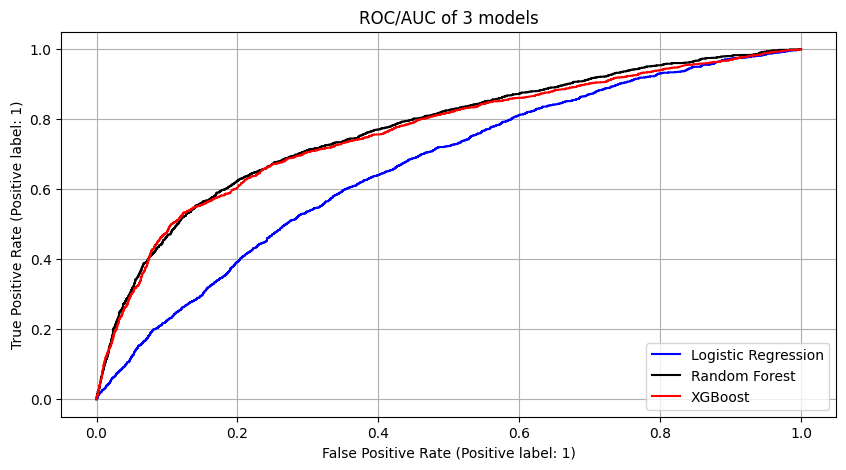

In [44]:
# Plot ROC_AUC curve of 3 models

fig,ax=plt.subplots(figsize=(10,5))

RocCurveDisplay.from_estimator(lor_best, X_test, y_test,ax=ax, color="blue",label='Logistic Regression')
RocCurveDisplay.from_estimator(rfc_best, X_test, y_test,ax=ax, color="black",label='Random Forest')
RocCurveDisplay.from_estimator(xgb_best, X_test, y_test,ax=ax, color="red",label='XGBoost')

plt.title('ROC/AUC of 3 models')
plt.grid()

**PRECISION - RECALL CURVE**

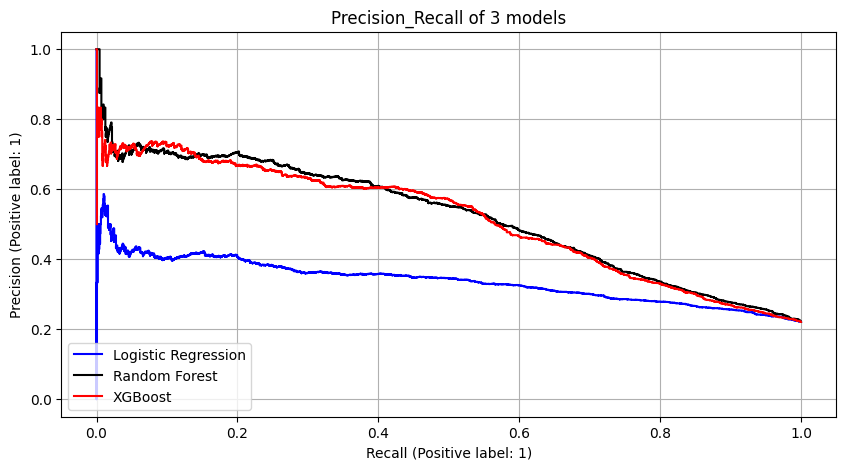

In [45]:
# Compare 3 models' Precision_recall curves
fig,ax=plt.subplots(figsize=(10,5))

PrecisionRecallDisplay.from_estimator(lor_best, X_test, y_test, ax=ax,color="blue",label='Logistic Regression')
PrecisionRecallDisplay.from_estimator(rfc_best, X_test, y_test, ax=ax,color="black",label='Random Forest')
PrecisionRecallDisplay.from_estimator(xgb_best, X_test, y_test, ax=ax,color="red",label='XGBoost')

plt.title('Precision_Recall of 3 models')
plt.grid()

COMPARE MODELS WITH DUMMIES

**RECOMMEND**

I would recommend Logistic Regression since it has highest recall for default cases